In [88]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{'width': 1024, 'height': 768, 'scroll': True}

![](./assets/DJlogo_alpha.png?raw=true)<!-- .element height="80%" width="80%" -->

<http://www.DataJavelin.com>
## Dr Peter Hurley & Dr Phil Rooney

## Data Science

$$Data + Model = Prediction$$
* *Extracting information from Data*<!-- .element: class="fragment" -->
* *Using information to make predictions, decisions etc*<!-- .element: class="fragment" -->

A machine learning prediction is made by combining a model with data to form the prediction. The manner in which this is done gives us the machine learning algorithm.

## Probabilistic models 
* A model describes data that one could observe from a system
* Uses probability theory to express all forms of uncertainty and noise associated with our model
* Inverse probability (i.e. Bayes rule) to infer parameters, adapt models, make predictions and learn from data.



## Bayes Rule
$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

* Bayesian probability is an alternative and more intuitive view of probability than frequentist approach. 
* Bayesian probability is seen as a measure of uncertianty.
* Frequentist approach describes probability as *number of succcessful events* (e.g. number of times you will roll a 6 on a dice)

A good example of how Bayesian probability is more intuitive is to think of a situation such as the probability of rain, given the sky is cloudy, or that there is a sprinkler nearby. We use prior information to decide if it has rained, rather than just looking at the number of times it has rained in past.


## Bayesian Inference
$$P(\theta|D,M) \propto P(D|\theta, M)P(\theta|M)$$

* $P(\theta|M)$ = Prior. Probability of parameters, given model
* $P(D|\theta, M)$ = Likelihood. Probability of Data, given parameters and model
* $P(\theta|D,M)$ = Posterior. Probability of parameters, given Data and model


* Transparent way of including model prior information
* Gives full probability distribution

### Prob. model of straight line
$\mathbf{y}=m\mathbf{x}+c + \epsilon$

likelihood = $p(\mathbf{y}|m,c,\mathbf{x}) = \mathcal{N}(m\mathbf{x}+c,\sigma^2)$

prior = $p(m,c) = \mathcal{N}(0,\Sigma_p)$

posterior (after a bit of maths)

$p(m,c|\mathbf{y},\mathbf{x}) \propto  \mathcal{N}(\sigma^{-2}(\sigma^{-2}\mathbf{x}\mathbf{x}^T + \Sigma_{p}^{-1})^{-1}\mathbf{x}\mathbf{y},$
$\sigma^{-2}\mathbf{x}\mathbf{x}^T + \Sigma_{p}^{-1})$

Simple example straight line, error only in y, simple gaussian prior
What happens if intercept is positive.. gets complicated

### Why bother with all this Bayesian probabilistic stuff?
* Prior information help us extract more information from data

![](./assets/line_1.png?raw=true)


![](./assets/line_2.png?raw=true)


Have prior information on intercept

$c \sim \mathcal{N}(0.3,0.1)$

![](./assets/line_3.png?raw=true)


Combination of prior information and data point help constrain slope


![](./assets/line_4.png?raw=true)


* The uncertainty in our inferred model parameters contains information.

> We do not want to just know the best answer, we
want to know how uncertain we are.

<img src="./assets/max_like.png" alt="Drawing" style="width: 600px;"/>

<img src="./assets/max_like_2.png" alt="Drawing" style="width: 600px;"/>

<img src="./assets/curved_posterior.png" alt="Drawing" style="width: 600px;"/>

<img src="./assets/curved_posterior_probx.png" alt="Drawing" style="width: 600px;"/>

<img src="./assets/curved_posterior_proby.png" alt="Drawing" style="width: 600px;"/>

### Using Uncertianty in decision making means making better decisions

* Business consider risk when making decisions
* Uncertianty should be considered when making decisions based on predictions

See [Blog post on Bayesian Decision making](https://pdh21.github.io/jekyll/update/2019/06/06/FACYNation_BDT.html)

## Probabilistic Programming
*Define probability models & solve automatically*

<img src="./assets/probprog.png" alt="Drawing" style="width: 600px;"/>

# Stan 
<img src="http://mc-stan.org/images/stan_logo.png" alt="Drawing" style="width: 100px;"/>

* Language for building probabilistic models
* Algorithms for fitting probabilistic models
* Interfaces for using probabilistic models 

## Language
Specify probabilisitic model: the joint probability distribution function,

$$p(\theta,x)$$

* $\theta$ = parameters
* $x$ = data
* $p$ = model

Stan is a language:
* Statically typed, imperative
* User can define programs using parameters, data and  $\log p(\theta,x)$
* Any program can be written as long as $\log p(\theta,x)$ is differentiable


Statically typed like C, C++. i.e. types declared at compile time rather than run time like Python.

Imperative, you tell the compiler what you want to happen, step by step

## Algorithms
* Bayesian Inference: No U-Turn Hamiltonian Monte Carlo,
    - $p(\theta|x)$ approximated with $[\theta^1,\theta^2,..\theta^N]$
* Approximate Bayesian Inference: Variational Inference,
    - $\hat{p}(\theta|x) \approx q(\hat{\phi})$, where $\phi = argmin_{\phi} D_{KL}(q(\theta|\phi)||p(\theta,x))$
* Optimisation: Max 
    - $\hat{\theta} = argmax_{\theta} p(\theta,x)$
    

## Interfaces
* CmdStan,PyStan,RStan
* C++ API
* C++ auto-diff library
* Software built with Stan: RStanArm, brms, prophet

## If it's just MCMC, why all the fuss?
Lets compare Stan with emcee!

* Sample from a ?? dimensional multivariate Gaussian

In [26]:
# import modules
import emcee
import pystan
import numpy as np
import pylab as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline

In [77]:
data={
    'D':10,# number of dimensions
    'vari':1.0, # diagonal elements of covariance matrix
    'covar':0.5, # off-diagonal elements of covaraiance matrix
}

In [79]:
Sig=np.full((data['D'],data['D']),data['covar'])
for i in range(0,data['D']):
    Sig[i,i]=data['vari']
    
samp=np.random.multivariate_normal(np.zeros(data['D']),Sig,2000)

In [ ]:
### Stan

In [17]:
# Stan Model
model="""
data{
int<lower=1> D; //dimensions
real<lower=0.0> vari; //variance
real<lower=0.0> covar; //covariance
}
transformed data{
vector[D] mu; //location
cov_matrix[D] Sigma; //covariance matrix
for (i in 1:D){
for (k in 1:D){
Sigma[i,k]=covar;
}
}
for (i in 1:D){
Sigma[i,i]=vari;
mu[i]=0.0;
}
}
parameters{
vector[D] y;
}
model{
y ~ multi_normal(mu,Sigma); //sample from multi-D Gaussian
}
"""

In [18]:
# Compile Stan model
sm=pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b10f4ceb5e4759fbb8767a726b0ab793 NOW.


In [80]:
# Fit Model
fit=sm.sampling(data=data,iter=1000,chains=4)

### Emcee

In [83]:
inv_Sig=np.linalg.inv(np.matrix(Sig))
# define log probability
def lnprob(x,inv_Sig):
    x_tmp=np.matrix(x)
    return -0.5*x_tmp*inv_Sig*x_tmp.T

ndim, nwalkers = data['D'], 200
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[inv_Sig])
emcee_samples=sampler.run_mcmc(p0, 500)

### Comparison

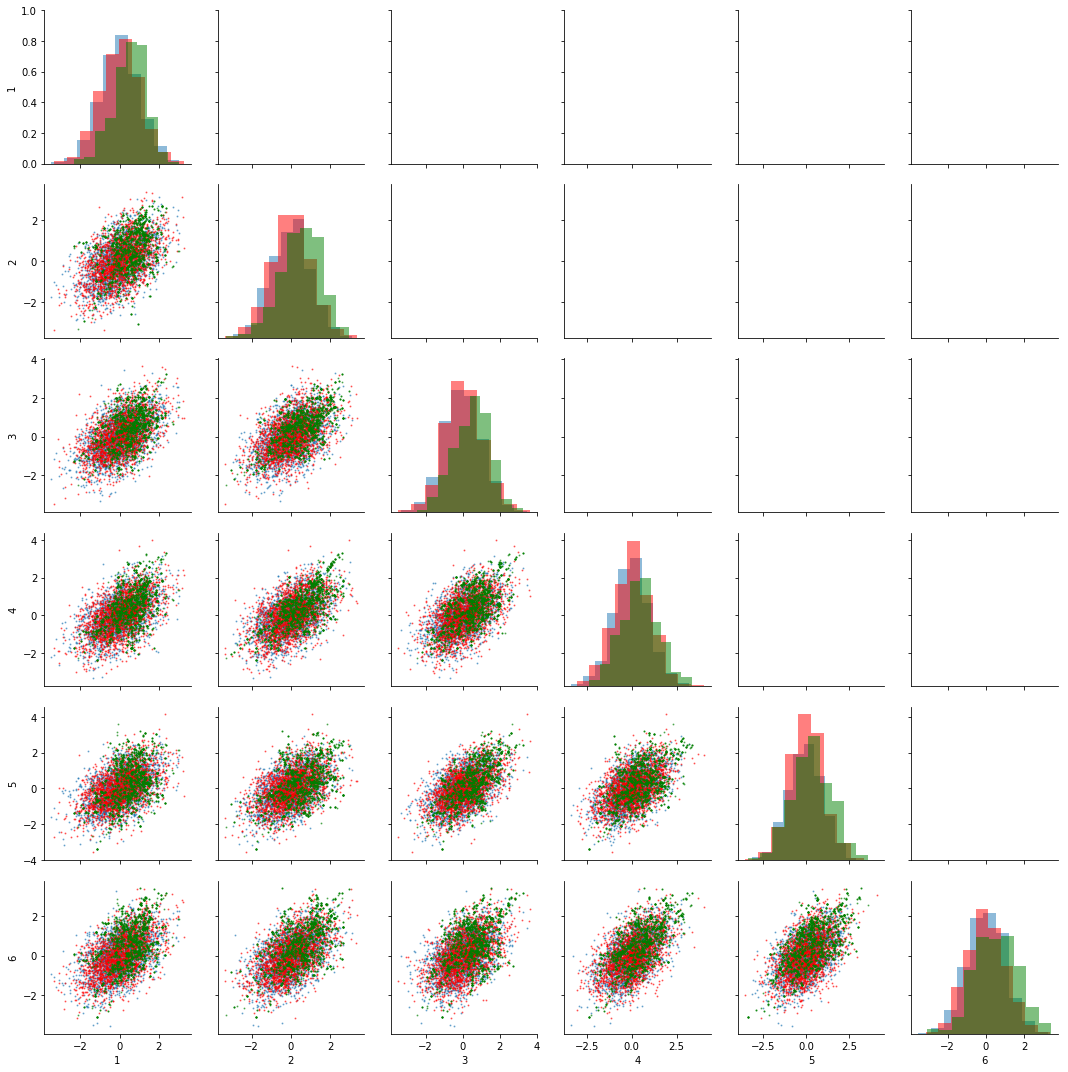

In [86]:
g=sns.PairGrid(pd.DataFrame(fit['y'][:,[0,1,2,3,4,5]],columns=[str(i) for i in range(1,7)]))
g.map_diag(plt.hist,alpha=0.5)
g.map_lower(plt.scatter,alpha=0.5,s=1)
g.data=pd.DataFrame(samp[:,[0,1,2,3,4,5]],columns=[str(i) for i in range(1,7)])
g.map_diag(plt.hist,color='red',alpha=0.5)
g.map_lower(plt.scatter,alpha=0.5,s=1,color='red')
g.data=pd.DataFrame(sampler.flatchain[:,[0,1,2,3,4,5]],columns=[str(i) for i in range(1,7)])
g.map_diag(plt.hist,color='green',alpha=0.5)
g.map_lower(plt.scatter,alpha=0.5,s=1,color='green')


### Look at Trace in one dimensions

Text(0.5, 0, 'samples')

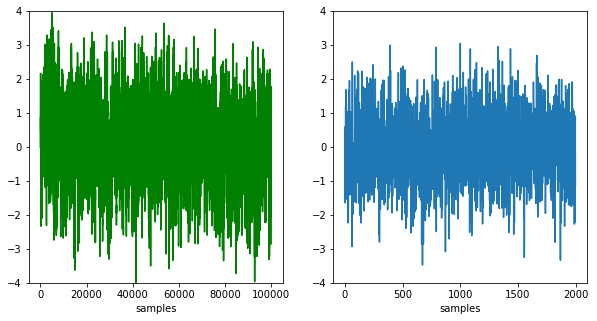

In [85]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(sampler.flatchain[:,0],c='g')
plt.ylim(-4,4)
plt.xlabel('samples');
plt.title('emcee');
plt.subplot(1,2,2)
plt.plot(fit['y'][:,0])
plt.ylim(-4,4)
plt.xlabel('samples');
plt.title('Stan');

There is a fundamental reason as to why ensemble methods such as Goodman and Weare’s walker algorithm (which is what emcee uses) fail in high dimensions.

1. We want to draw a sample from the typical set
2. The typical set is a thin shell a fixed radius from the mode in a multivariate normal
3. Interpolating or extrapolating two points in this shell is unlikely to fall in this shell
4. The only steps that get accepted will be near one of the starting points
5. The samplers devolve to a random walk with poorly biased choice of direction

More details here:
https://statmodeling.stat.columbia.edu/2017/03/15/ensemble-methods-doomed-fail-high-dimensions/

No U-Turn Hamiltonian Monte Carlo:

Michael Betancourt's talk for why HMC works can be found [here](https://www.youtube.com/watch?v=jUSZboSq1zg&t=1763s)

[Bob Carpenter's case study on typical sets and curse of dimensionality for more information](https://mc-stan.org/users/documentation/case-studies/curse-dims.html)

### Summary
* NUTS Hamiltonian MC sampler can sample from complex, high dimensional posteriors
* It knows when something is up (compared to diagnosing problems with other MCMC algorithms)
* Opens up a wide range of possible models for us (the data scientists) to build, without worrying about inference details